In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import chi2_contingency

# load and investigate the data here:

atp_df =pd.read_csv("tennis_stats.csv")
print(atp_df.head())
print(atp_df.describe())







                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

# perform exploratory analysis here:

/Users/jsalgado/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


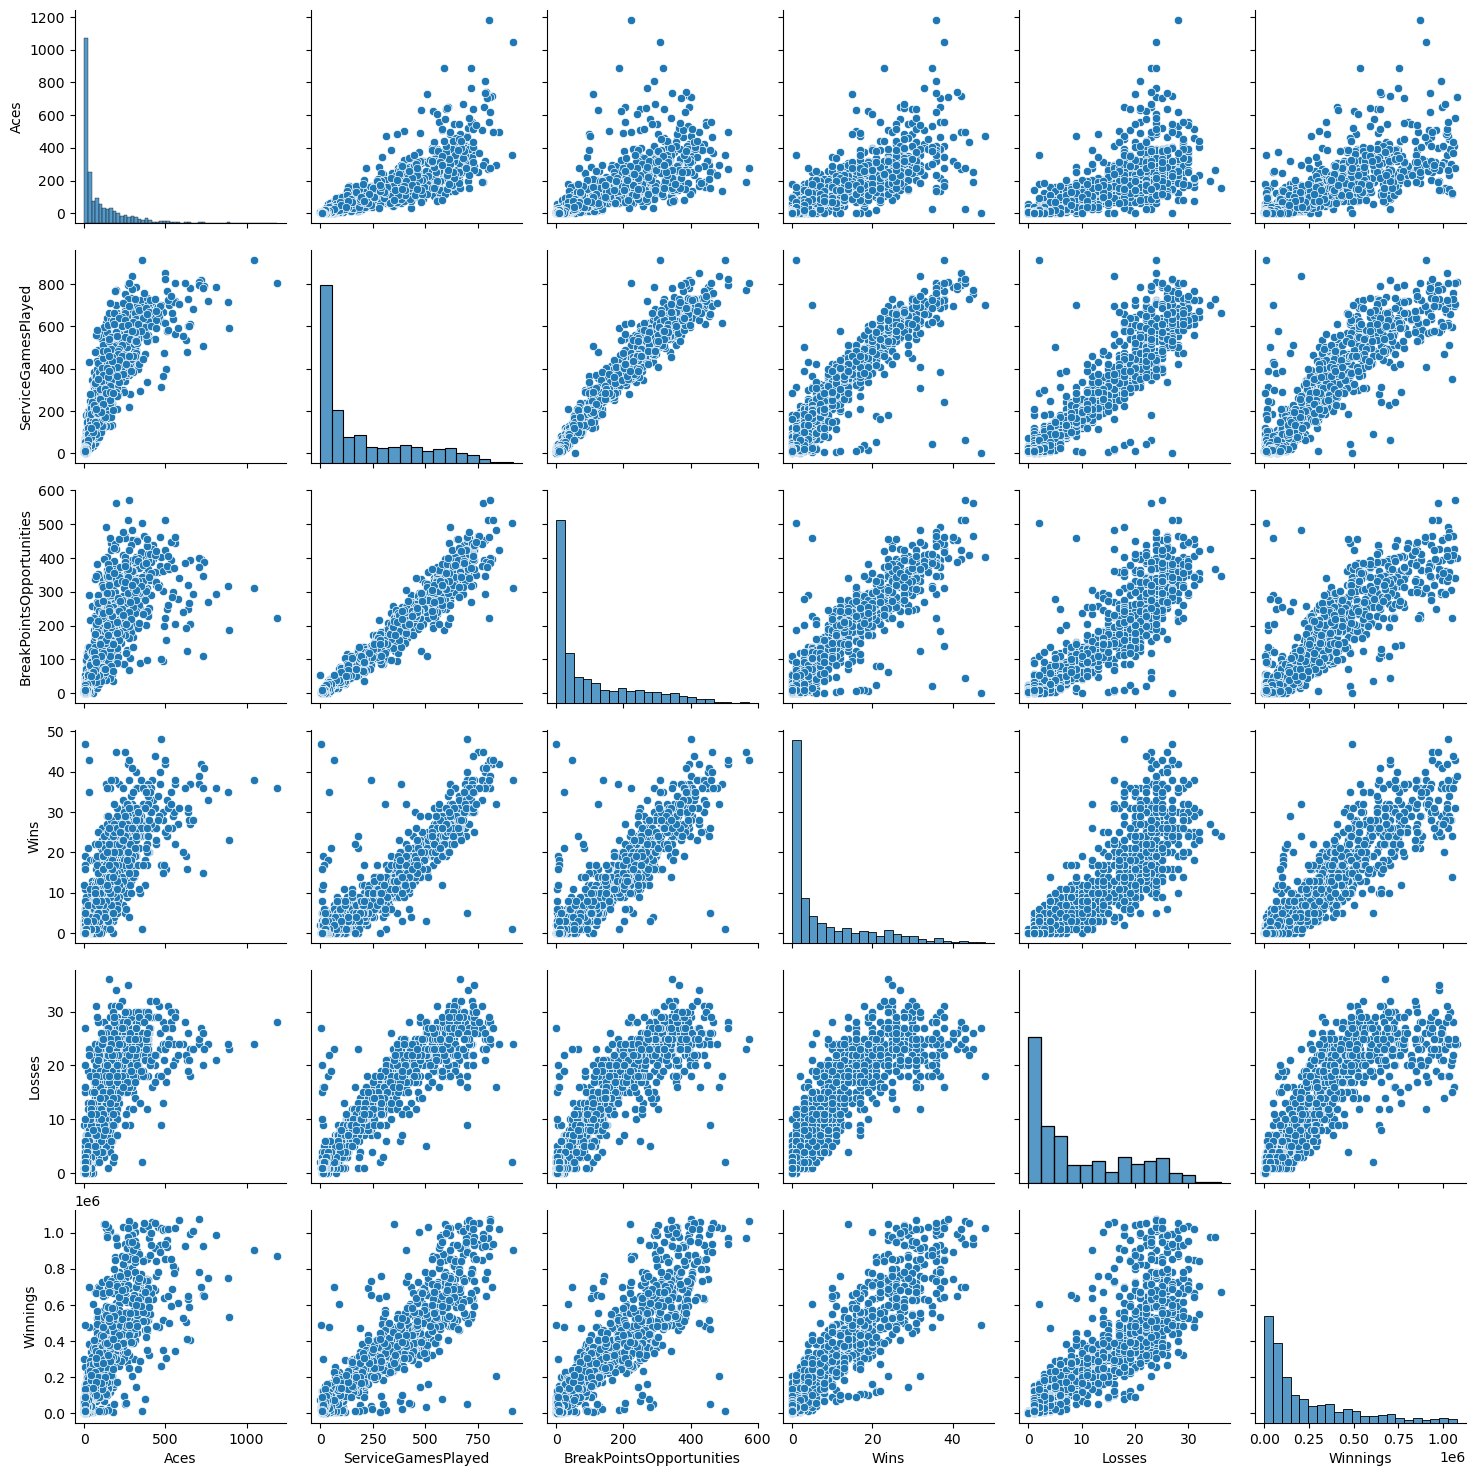

<Figure size 640x480 with 0 Axes>

In [5]:


df = atp_df[['Aces', 'ServiceGamesPlayed', 'BreakPointsOpportunities', 'Wins', 'Losses','Winnings']]

sns.pairplot(df)
plt.show()
plt.clf()

## perform two feature linear regressions here:

Prediction score wins vs BreakPointsOpportunities : 0.84


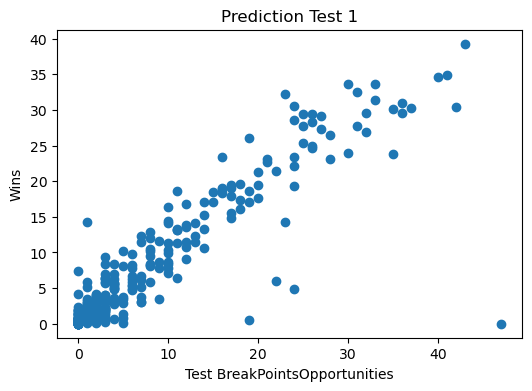

Prediction score wins vs ServiceGamesPlayed: 0.89


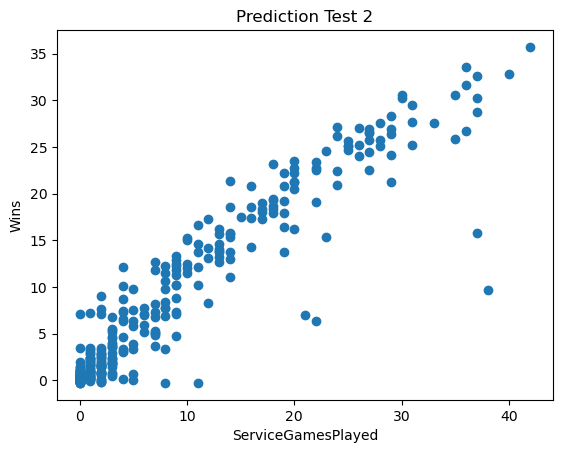

<Figure size 640x480 with 0 Axes>

In [6]:


# BreakPointsOpportunities

features = atp_df[['BreakPointsOpportunities']]
outcomes = atp_df[['Wins']]
features_train, features_test, outcomes_train, outcomes_test = train_test_split(features, outcomes, train_size =  0.8, test_size = 0.2)
m = LinearRegression()
m.fit(features_train, outcomes_train)
outcomes_prediction = m.predict(features_test)

print(f"Prediction score wins vs BreakPointsOpportunities : {m.score(features_test, outcomes_test):.2f}")
plt.figure(figsize = (6,4))
plt.scatter(outcomes_test, outcomes_prediction)
plt.xlabel('Test BreakPointsOpportunities')
plt.ylabel('Wins')
plt.title('Prediction Test 1')
plt.show()

# ServiceGamesPlayed

features = atp_df[['ServiceGamesPlayed']]
outcomes = atp_df[['Wins']]
features_train, features_test, outcomes_train, outcomes_test = train_test_split(features, outcomes, train_size =  0.8, test_size = 0.2)
m = LinearRegression()
m.fit(features_train, outcomes_train)
outcomes_prediction = m.predict(features_test)

print(f"Prediction score wins vs ServiceGamesPlayed: {m.score(features_test, outcomes_test):.2f}")

plt.scatter(outcomes_test, outcomes_prediction)
plt.xlabel('ServiceGamesPlayed')
plt.ylabel('Wins')
plt.title('Prediction Test 2')
plt.show()
plt.clf()


# perform two variables on features and linear Regression

Prediction score wins vs two variables features: 0.90


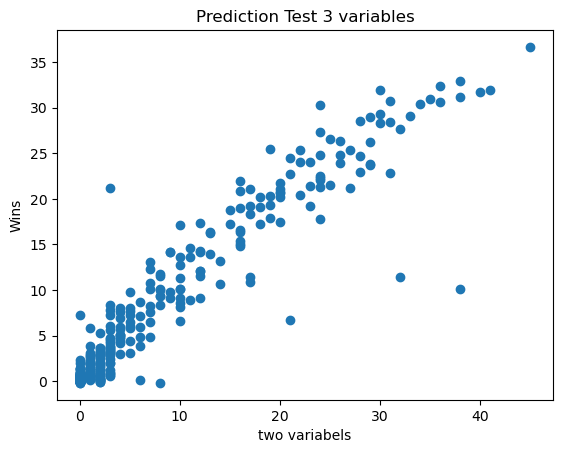

<Figure size 640x480 with 0 Axes>

In [7]:

features = atp_df[['BreakPointsOpportunities', 'ServiceGamesPlayed' ]]
outcomes = atp_df[['Wins']]

features_train, features_test, outcomes_train, outcomes_test = train_test_split(features, outcomes, train_size =  0.8, test_size = 0.2)
m = LinearRegression()
m.fit(features_train, outcomes_train)
outcomes_prediction = m.predict(features_test)

print(f"Prediction score wins vs two variables features: {m.score(features_test, outcomes_test):.2f}")


plt.scatter(outcomes_test, outcomes_prediction)
plt.xlabel('two variabels')
plt.ylabel('Wins')
plt.title('Prediction Test 3 variables')
plt.show()
plt.clf()




## perform multiple feature linear regressions here:

Prediction score winnings vs all variables features: 0.91


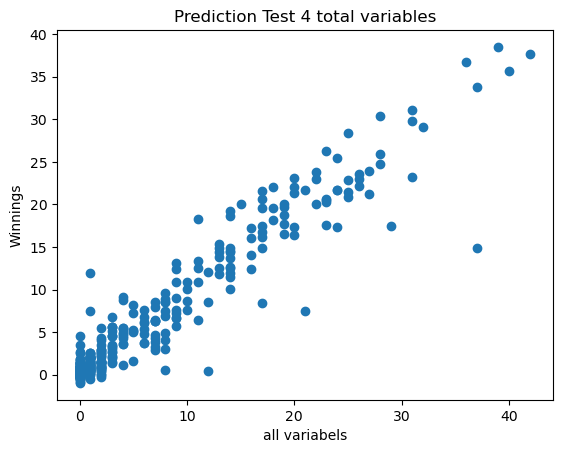

<Figure size 640x480 with 0 Axes>

In [10]:

features = atp_df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = atp_df[['Winnings']]

features_train, features_test, outcomes_train, outcomes_test = train_test_split(features, outcomes, train_size =  0.8, test_size = 0.2)
m = LinearRegression()
m.fit(features_train, outcomes_train)
outcomes_prediction = m.predict(features_test)

print(f"Prediction score winnings vs all variables features: {m.score(features_test, outcomes_test):.2f}")


plt.scatter(outcomes_test, outcomes_prediction)
plt.xlabel('all variabels')
plt.ylabel('Winnings')
plt.title('Prediction Test 4 total variables')
plt.show()
plt.clf()